In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import datetime

In [2]:
df=pd.read_csv(r"C:\Users\shwet\Downloads\H2HBABBA2497.csv")

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR us,2019-05-30 00:00:00,2019.0,1.929314e+09,2019-05-14,20190513,20190514,20190529.0,USD,RV,1.0,NaN,4167.24,20190514.0,NAH4,1.929314e+09,0
1,U001,200881076,ALBERT corporation,NaN,2020.0,1.930850e+09,2020-05-01,20200502,20200501,20200516.0,USD,RV,1.0,NaN,76693.51,20200501.0,NAA8,1.930850e+09,1
2,U001,0200769623,WAL-MAR llc,2019-06-11 00:00:00,2019.0,1.929404e+09,2019-05-31,20190530,20190531,20190615.0,USD,RV,1.0,NaN,992.52,20190531.0,NAH4,1.929404e+09,0
3,CA02,0140104409,LOB in,2019-11-29 00:00:00,2019.0,2.960593e+09,2019-11-16,20191117,20191116,20191128.0,CAD,RV,1.0,NaN,464709.60,20191118.0,CA10,2.960593e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-06-17 00:00:00,2019.0,1.929399e+09,2019-05-30,20190529,20190530,20190614.0,USD,RV,1.0,NaN,6921.92,20190530.0,NAH4,1.929399e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0100044010,LAND foundation,NaN,2020.0,1.930765e+09,2020-04-09,20200408,20200409,20200511.0,USD,RV,1.0,NaN,46490.22,20200409.0,NA32,1.930765e+09,1
49996,U001,0100031704,DELHAIZE in,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,23538.52,20200403.0,NAA8,1.930738e+09,1
49997,U001,0200416837,DEC corporation,NaN,2020.0,1.930860e+09,2020-05-05,20200505,20200505,20200524.0,USD,RV,1.0,NaN,1160.75,20200501.0,NAM4,1.930860e+09,1
49998,U001,CCU013,KRAFT F in,2019-06-28 00:00:00,2019.0,1.929257e+09,2019-05-07,20190506,20190507,20190507.0,USD,RV,1.0,NaN,9558.69,20190507.0,NAX2,1.929257e+09,0


# PREPROCESING

In [4]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [5]:
df.drop('area_business',axis=1,inplace=True)

In [6]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

# FRATURE ENGINEERING

In [7]:
main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]

In [8]:
main_train.shape

(40000, 18)

In [9]:
main_train.drop_duplicates(subset=None,keep='first',inplace=True)

In [10]:
main_train.drop(['doc_id','posting_id',"isOpen","document_create_date.1","buisness_year"],axis=1,inplace=True)

In [11]:
main_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR us,2019-05-30 00:00:00,2019-05-14,20190513,20190529.0,USD,RV,4167.24,20190514.0,NAH4,1.929314e+09
2,U001,0200769623,WAL-MAR llc,2019-06-11 00:00:00,2019-05-31,20190530,20190615.0,USD,RV,992.52,20190531.0,NAH4,1.929404e+09
3,CA02,0140104409,LOB in,2019-11-29 00:00:00,2019-11-16,20191117,20191128.0,CAD,RV,464709.60,20191118.0,CA10,2.960593e+09
4,U001,0200769623,WAL-MAR foundation,2019-06-17 00:00:00,2019-05-30,20190529,20190614.0,USD,RV,6921.92,20190530.0,NAH4,1.929399e+09
5,CA02,0140104429,COSTCO foundation,2019-10-04 00:00:00,2019-09-21,20190921,20191004.0,CAD,RV,91026.14,20190924.0,CA10,2.960582e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,0200747369,SCHNU systems,2019-10-21 00:00:00,2019-10-06,20191005,20191021.0,USD,RV,135561.66,20191006.0,NAA8,1.929973e+09
49993,U001,0200761734,H E BUT corp,2019-06-18 00:00:00,2019-06-04,20190604,20190619.0,USD,RV,39979.56,20190604.0,NAA8,1.929425e+09
49994,U001,0200707822,PUBLI us,2019-09-23 00:00:00,2019-09-08,20190907,20190923.0,USD,RV,137146.51,20190908.0,NAA8,1.929844e+09
49998,U001,CCU013,KRAFT F in,2019-06-28 00:00:00,2019-05-07,20190506,20190507.0,USD,RV,9558.69,20190507.0,NAX2,1.929257e+09


In [12]:
main_train['document_create_date']=pd.to_datetime(main_train['document_create_date'],format ='%Y%m%d')

In [13]:
main_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR us,2019-05-30 00:00:00,2019-05-14,2019-05-13,20190529.0,USD,RV,4167.24,20190514.0,NAH4,1.929314e+09
2,U001,0200769623,WAL-MAR llc,2019-06-11 00:00:00,2019-05-31,2019-05-30,20190615.0,USD,RV,992.52,20190531.0,NAH4,1.929404e+09
3,CA02,0140104409,LOB in,2019-11-29 00:00:00,2019-11-16,2019-11-17,20191128.0,CAD,RV,464709.60,20191118.0,CA10,2.960593e+09
4,U001,0200769623,WAL-MAR foundation,2019-06-17 00:00:00,2019-05-30,2019-05-29,20190614.0,USD,RV,6921.92,20190530.0,NAH4,1.929399e+09
5,CA02,0140104429,COSTCO foundation,2019-10-04 00:00:00,2019-09-21,2019-09-21,20191004.0,CAD,RV,91026.14,20190924.0,CA10,2.960582e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,0200747369,SCHNU systems,2019-10-21 00:00:00,2019-10-06,2019-10-05,20191021.0,USD,RV,135561.66,20191006.0,NAA8,1.929973e+09
49993,U001,0200761734,H E BUT corp,2019-06-18 00:00:00,2019-06-04,2019-06-04,20190619.0,USD,RV,39979.56,20190604.0,NAA8,1.929425e+09
49994,U001,0200707822,PUBLI us,2019-09-23 00:00:00,2019-09-08,2019-09-07,20190923.0,USD,RV,137146.51,20190908.0,NAA8,1.929844e+09
49998,U001,CCU013,KRAFT F in,2019-06-28 00:00:00,2019-05-07,2019-05-06,20190507.0,USD,RV,9558.69,20190507.0,NAX2,1.929257e+09


In [14]:
main_train['due_in_date']=pd.to_datetime(main_train['due_in_date'],format ='%Y%m%d')

In [15]:
main_train['baseline_create_date']=pd.to_datetime(main_train['baseline_create_date'],format ='%Y%m%d')

In [16]:
main_train['clear_date']=pd.to_datetime(main_train['clear_date'],format ='%Y-%m-%d %H:%M')

In [17]:
main_train['posting_date']=pd.to_datetime(main_train['posting_date'],format ='%Y-%m-%d')

In [18]:
main_train['document_create_date']=pd.to_datetime(main_train['document_create_date'],format ='%Y%m%d')

In [19]:
main_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR us,2019-05-30,2019-05-14,2019-05-13,2019-05-29,USD,RV,4167.24,2019-05-14,NAH4,1.929314e+09
2,U001,0200769623,WAL-MAR llc,2019-06-11,2019-05-31,2019-05-30,2019-06-15,USD,RV,992.52,2019-05-31,NAH4,1.929404e+09
3,CA02,0140104409,LOB in,2019-11-29,2019-11-16,2019-11-17,2019-11-28,CAD,RV,464709.60,2019-11-18,CA10,2.960593e+09
4,U001,0200769623,WAL-MAR foundation,2019-06-17,2019-05-30,2019-05-29,2019-06-14,USD,RV,6921.92,2019-05-30,NAH4,1.929399e+09
5,CA02,0140104429,COSTCO foundation,2019-10-04,2019-09-21,2019-09-21,2019-10-04,CAD,RV,91026.14,2019-09-24,CA10,2.960582e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,0200747369,SCHNU systems,2019-10-21,2019-10-06,2019-10-05,2019-10-21,USD,RV,135561.66,2019-10-06,NAA8,1.929973e+09
49993,U001,0200761734,H E BUT corp,2019-06-18,2019-06-04,2019-06-04,2019-06-19,USD,RV,39979.56,2019-06-04,NAA8,1.929425e+09
49994,U001,0200707822,PUBLI us,2019-09-23,2019-09-08,2019-09-07,2019-09-23,USD,RV,137146.51,2019-09-08,NAA8,1.929844e+09
49998,U001,CCU013,KRAFT F in,2019-06-28,2019-05-07,2019-05-06,2019-05-07,USD,RV,9558.69,2019-05-07,NAX2,1.929257e+09


In [20]:
main_train.shape

(39088, 13)

In [21]:
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
dtype: object

In [22]:
main_train['delay']=(main_train['clear_date']-main_train['due_in_date']).dt.days

In [23]:
main_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR us,2019-05-30,2019-05-14,2019-05-13,2019-05-29,USD,RV,4167.24,2019-05-14,NAH4,1.929314e+09,1
2,U001,0200769623,WAL-MAR llc,2019-06-11,2019-05-31,2019-05-30,2019-06-15,USD,RV,992.52,2019-05-31,NAH4,1.929404e+09,-4
3,CA02,0140104409,LOB in,2019-11-29,2019-11-16,2019-11-17,2019-11-28,CAD,RV,464709.60,2019-11-18,CA10,2.960593e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-06-17,2019-05-30,2019-05-29,2019-06-14,USD,RV,6921.92,2019-05-30,NAH4,1.929399e+09,3
5,CA02,0140104429,COSTCO foundation,2019-10-04,2019-09-21,2019-09-21,2019-10-04,CAD,RV,91026.14,2019-09-24,CA10,2.960582e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,0200747369,SCHNU systems,2019-10-21,2019-10-06,2019-10-05,2019-10-21,USD,RV,135561.66,2019-10-06,NAA8,1.929973e+09,0
49993,U001,0200761734,H E BUT corp,2019-06-18,2019-06-04,2019-06-04,2019-06-19,USD,RV,39979.56,2019-06-04,NAA8,1.929425e+09,-1
49994,U001,0200707822,PUBLI us,2019-09-23,2019-09-08,2019-09-07,2019-09-23,USD,RV,137146.51,2019-09-08,NAA8,1.929844e+09,0
49998,U001,CCU013,KRAFT F in,2019-06-28,2019-05-07,2019-05-06,2019-05-07,USD,RV,9558.69,2019-05-07,NAX2,1.929257e+09,52


In [24]:
main_train.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
24654,U001,CCU013,KRAFT F trust,2019-03-01,2018-12-30,2018-12-31,2018-12-30,USD,RV,7886.40,2018-12-30,NAX2,1.928533e+09,61
19310,U001,0200769623,WAL-MAR,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,RV,48332.52,2018-12-30,NAH4,1.928541e+09,-5
21605,U001,0200744019,TARG corp,2019-01-11,2018-12-30,2018-12-31,2019-01-14,USD,RV,11309.19,2018-12-30,NAA8,1.928532e+09,-3
12170,U001,0200769623,WAL-MAR co,2019-01-09,2018-12-30,2018-12-29,2019-01-14,USD,RV,71113.85,2018-12-30,NAH4,1.928537e+09,-5
6310,U001,0200779906,BOZZU us,2019-01-16,2018-12-30,2018-12-30,2019-01-14,USD,RV,110569.17,2018-12-30,NAA8,1.928541e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25893,U001,0200357714,US foundation,2020-03-13,2020-02-27,2020-02-27,2020-03-13,USD,RV,13783.54,2020-02-27,NAA8,1.930581e+09,0
6719,U001,0200413833,LDC corp,2020-03-20,2020-02-27,2020-02-25,2020-03-13,USD,RV,28311.65,2020-02-27,NAA8,1.930566e+09,7
9772,U001,0200794332,COST systems,2020-03-12,2020-02-27,2020-02-26,2020-03-13,USD,RV,30220.01,2020-02-27,NAAX,1.930573e+09,-1
49764,U001,0200759878,SA co,2020-03-13,2020-02-27,2020-02-26,2020-03-13,USD,RV,70224.85,2020-02-27,NAH4,1.930574e+09,0


In [25]:
X = main_train.drop('delay',axis=1)
y = main_train['delay']

# EDA

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [27]:
X_train.shape , X_val.shape , X_test.shape

((27361, 13), (5863, 13), (5864, 13))

<AxesSubplot:xlabel='delay', ylabel='Density'>

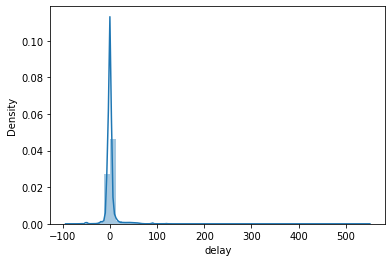

In [28]:
import seaborn as sns
sns.distplot(y_train)

In [29]:

X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,0,U001,0200769623,WAL-MAR us,2019-05-30,2019-05-14,2019-05-13,2019-05-29,USD,RV,4167.24,2019-05-14,NAH4,1.929314e+09,1
1,2,U001,0200769623,WAL-MAR llc,2019-06-11,2019-05-31,2019-05-30,2019-06-15,USD,RV,992.52,2019-05-31,NAH4,1.929404e+09,-4
2,3,CA02,0140104409,LOB in,2019-11-29,2019-11-16,2019-11-17,2019-11-28,CAD,RV,464709.60,2019-11-18,CA10,2.960593e+09,1
3,4,U001,0200769623,WAL-MAR foundation,2019-06-17,2019-05-30,2019-05-29,2019-06-14,USD,RV,6921.92,2019-05-30,NAH4,1.929399e+09,3
4,5,CA02,0140104429,COSTCO foundation,2019-10-04,2019-09-21,2019-09-21,2019-10-04,CAD,RV,91026.14,2019-09-24,CA10,2.960582e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27356,34766,U001,0200781803,JRD llc,2019-10-25,2019-10-10,2019-10-10,2019-10-25,USD,RV,12874.95,2019-10-10,NAA8,1.929996e+09,0
27357,34767,U001,0200781831,RITE foundation,2019-11-29,2019-11-13,2019-11-14,2019-11-28,USD,RV,53762.86,2019-11-13,NAA8,1.930153e+09,1
27358,34768,U001,200418007,AM corp,2019-06-07,2019-05-22,2019-05-17,2019-06-06,USD,RV,5712.00,2019-05-22,NAA8,1.929335e+09,1
27359,34769,U001,0200782669,SYGMA,2020-01-16,2019-12-31,2019-12-31,2020-02-01,USD,RV,4110.40,2019-12-31,NA32,1.930337e+09,-16


# SCATTERPLOT

<AxesSubplot:xlabel='delay', ylabel='posting_date'>

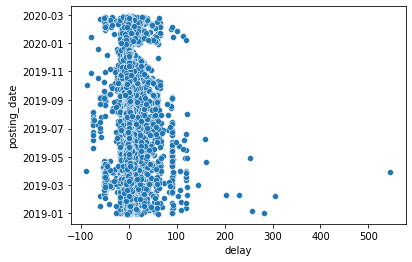

In [30]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date")

In [31]:
correlation = df.corr()

# FRATURE_SELECTION

<AxesSubplot:>

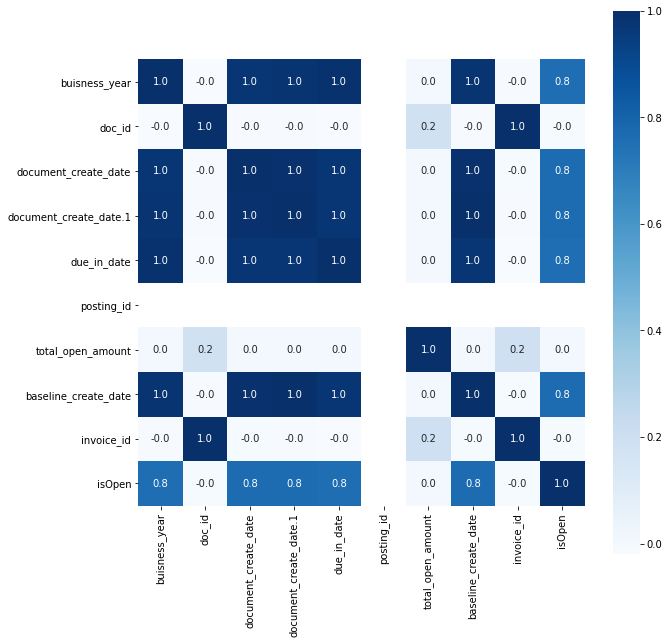

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27361 entries, 0 to 34770
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27361 non-null  object        
 1   cust_number           27361 non-null  object        
 2   name_customer         27361 non-null  object        
 3   clear_date            27361 non-null  datetime64[ns]
 4   posting_date          27361 non-null  datetime64[ns]
 5   document_create_date  27361 non-null  datetime64[ns]
 6   due_in_date           27361 non-null  datetime64[ns]
 7   invoice_currency      27361 non-null  object        
 8   document type         27361 non-null  object        
 9   total_open_amount     27361 non-null  float64       
 10  baseline_create_date  27361 non-null  datetime64[ns]
 11  cust_payment_terms    27361 non-null  object        
 12  invoice_id            27359 non-null  float64       
dtypes: datetime64[ns

In [34]:
X_train["posting_day"] =X_train["posting_date"].dt.day
X_train["posting_month"]=X_train["posting_date"].dt.month
X_train["posting_year"]=X_train["posting_date"].dt.year

X_val["posting_day"] =X_val["posting_date"].dt.day
X_val["posting_month"]=X_val["posting_date"].dt.month
X_val["posting_year"]=X_val["posting_date"].dt.year

X_test["posting_day"] =X_test["posting_date"].dt.day
X_test["posting_month"]=X_test["posting_date"].dt.month
X_test["posting_year"]=X_test["posting_date"].dt.year

In [35]:
X_train["document_create_day"] =X_train["document_create_date"].dt.day
X_train["document_create_month"]=X_train["document_create_date"].dt.month
X_train["document_create_year"]=X_train["document_create_date"].dt.year

X_val["document_create_day"] =X_val["document_create_date"].dt.day
X_val["document_create_month"]=X_val["document_create_date"].dt.month
X_val["document_create_year"]=X_val["document_create_date"].dt.year

X_test["document_create_day"] =X_test["document_create_date"].dt.day
X_test["document_create_month"]=X_test["document_create_date"].dt.month
X_test["document_create_year"]=X_test["document_create_date"].dt.year

In [36]:
X_train["baseline_create_day"] =X_train["baseline_create_date"].dt.day
X_train["baseline_create_month"]=X_train["baseline_create_date"].dt.month
X_train["baseline_create_year"]=X_train["baseline_create_date"].dt.year

X_val["baseline_create_day"] =X_val["baseline_create_date"].dt.day
X_val["baseline_create_month"]=X_val["baseline_create_date"].dt.month
X_val["baseline_create_year"]=X_val["baseline_create_date"].dt.year

X_test["baseline_create_day"] =X_test["baseline_create_date"].dt.day
X_test["baseline_create_month"]=X_test["baseline_create_date"].dt.month
X_test["baseline_create_year"]=X_test["baseline_create_date"].dt.year

In [37]:
label_encoder = LabelEncoder()

In [38]:
X_train['business_code'].unique()

array(['U001', 'CA02', 'U002', 'U013', 'U005', 'U007'], dtype=object)

In [39]:
X_train['business_code']= label_encoder.fit_transform(X_train['business_code'])
X_val['business_code']= label_encoder.fit_transform(X_val['business_code'])
X_test['business_code']= label_encoder.fit_transform(X_test['business_code'])
  
X_train['business_code'].unique()
X_val['business_code'].unique()
X_test['business_code'].unique()

array([1, 4, 0, 2, 3])

In [40]:
X_train['cust_number']= label_encoder.fit_transform(X_train['cust_number'])
X_val['cust_number']= label_encoder.fit_transform(X_val['cust_number'])
X_test['cust_number']= label_encoder.fit_transform(X_test['cust_number'])
  
X_train['cust_number'].unique()
X_val['cust_number'].unique()
X_test['cust_number'].unique()

array([392, 133, 408, 164, 177, 184, 313, 308, 610, 564, 584, 203, 400,
       200, 348, 245, 359, 394, 653, 372, 272, 317, 466, 341, 159, 146,
       417, 353, 533, 458, 150, 395, 331, 375, 426, 312, 190, 321, 413,
       427, 246, 438, 537, 650, 357, 166, 618, 443, 500, 148,   2, 470,
       316, 525, 285, 633, 111,  41, 178, 488,   4, 544, 176, 371, 130,
       105, 315, 276, 332, 255, 144, 628, 267, 453, 129, 168, 355, 451,
       460, 361, 307, 644, 344, 345, 127, 515, 428,  53, 259, 421, 352,
       412, 327, 248, 399, 325, 471, 560, 243, 214, 619, 457,  50,  42,
       161, 581, 384, 575, 468, 270,  81, 571,  75, 479, 112, 435, 452,
       448, 324, 237, 425, 362, 137, 165, 271, 501, 132, 467, 326, 257,
       523, 342, 275, 318, 555, 430, 439,  37, 464, 220, 536, 181, 407,
        22, 374, 147, 499, 538, 401, 647, 652, 419, 135, 490, 510, 122,
       389, 377, 136,   0, 396, 351, 478, 100, 266, 286, 343, 328, 433,
       484, 391, 228, 192, 601, 240, 383, 277,  62, 314, 382, 36

In [41]:
X_train['name_customer']= label_encoder.fit_transform(X_train['name_customer'])
X_val['name_customer']= label_encoder.fit_transform(X_val['name_customer'])
X_test['name_customer']= label_encoder.fit_transform(X_test['name_customer'])
  
X_train['name_customer'].unique()

array([3166, 3163, 1791, ..., 1289, 1137, 1043])

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27361 entries, 0 to 34770
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          27361 non-null  int32         
 1   cust_number            27361 non-null  int32         
 2   name_customer          27361 non-null  int32         
 3   clear_date             27361 non-null  datetime64[ns]
 4   posting_date           27361 non-null  datetime64[ns]
 5   document_create_date   27361 non-null  datetime64[ns]
 6   due_in_date            27361 non-null  datetime64[ns]
 7   invoice_currency       27361 non-null  object        
 8   document type          27361 non-null  object        
 9   total_open_amount      27361 non-null  float64       
 10  baseline_create_date   27361 non-null  datetime64[ns]
 11  cust_payment_terms     27361 non-null  object        
 12  invoice_id             27359 non-null  float64       
 13  p

In [43]:
X_train['invoice_currency']= label_encoder.fit_transform(X_train['invoice_currency'])
X_val['invoice_currency']= label_encoder.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency']= label_encoder.fit_transform(X_test['invoice_currency'])

In [44]:
X_train['document type']= label_encoder.fit_transform(X_train['document type'])
X_val['document type']= label_encoder.fit_transform(X_val['document type'])
X_test['document type']= label_encoder.fit_transform(X_test['document type'])

In [45]:
X_train['cust_payment_terms']= label_encoder.fit_transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms']= label_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms']= label_encoder.fit_transform(X_test['cust_payment_terms'])

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27361 entries, 0 to 34770
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          27361 non-null  int32         
 1   cust_number            27361 non-null  int32         
 2   name_customer          27361 non-null  int32         
 3   clear_date             27361 non-null  datetime64[ns]
 4   posting_date           27361 non-null  datetime64[ns]
 5   document_create_date   27361 non-null  datetime64[ns]
 6   due_in_date            27361 non-null  datetime64[ns]
 7   invoice_currency       27361 non-null  int32         
 8   document type          27361 non-null  int32         
 9   total_open_amount      27361 non-null  float64       
 10  baseline_create_date   27361 non-null  datetime64[ns]
 11  cust_payment_terms     27361 non-null  int32         
 12  invoice_id             27359 non-null  float64       
 13  p

In [47]:
var=['business_code', 'cust_number', 'name_customer',
       'invoice_currency', 'document type', 'total_open_amount',
        'cust_payment_terms',
       'posting_day', 'posting_month', 'posting_year', 'document_create_day',
       'document_create_month', 'document_create_year', 'baseline_create_day',
       'baseline_create_month', 'baseline_create_year']

In [48]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'posting_date', 'document_create_date', 'due_in_date',
       'invoice_currency', 'document type', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id',
       'posting_day', 'posting_month', 'posting_year', 'document_create_day',
       'document_create_month', 'document_create_year', 'baseline_create_day',
       'baseline_create_month', 'baseline_create_year'],
      dtype='object')

# MODEL

# Linear_Regression

In [49]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train[var], y_train)

LinearRegression()

In [50]:
y_predict = base_model.predict(X_val[var])

In [51]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

11.462946334792841

In [52]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [53]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

# Tree Based Model

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=6)

In [55]:
regressor.fit(X_train[var], y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [56]:
y_predict2 = regressor.predict(X_val[var])

In [57]:
mean_squared_error(y_val, y_predict2, squared=False)

11.48705812604107

In [58]:
y_predict_test = regressor.predict(X_test[var])
mean_squared_error(y_test, y_predict_test, squared=False)

10.721536301822763

In [59]:
MSE_Score=[]
MSE_Score.append(mean_squared_error(y_val, y_predict2))

In [60]:
MSE_Score

[131.95250439104618]


# PREDICTION PROCESS

In [61]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,200881076,ALBERT corporation,NaN,2020.0,1.930850e+09,2020-05-01,20200502,20200501,20200516.0,USD,RV,1.0,76693.51,20200501.0,NAA8,1.930850e+09,1
7,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930648e+09,2020-03-15,20200313,20200315,20200330.0,USD,RV,1.0,14427.62,20200315.0,NAH4,1.930648e+09,1
8,CA02,0140104440,SO us,NaN,2020.0,2.960630e+09,2020-04-22,20200422,20200422,20200503.0,CAD,RV,1.0,55370.56,20200423.0,CA10,2.960630e+09,1
11,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930842e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,31045.62,20200501.0,NAH4,1.930842e+09,1
16,U001,100026809,PRES corporation,NaN,2020.0,1.930916e+09,2020-05-19,20200519,20200519,20200529.0,USD,RV,1.0,402.50,20200519.0,NA10,1.930916e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,U001,0200744019,TARG foundation,NaN,2020.0,1.930611e+09,2020-03-07,20200306,20200307,20200511.0,USD,RV,1.0,27576.44,20200307.0,NAGD,1.930611e+09,1
49990,U013,0140103278,COS corp,NaN,2020.0,1.991840e+09,2020-03-04,20200227,20200304,20200503.0,USD,RV,1.0,1356.04,20200304.0,NAUZ,1.991840e+09,1
49995,U001,0100044010,LAND foundation,NaN,2020.0,1.930765e+09,2020-04-09,20200408,20200409,20200511.0,USD,RV,1.0,46490.22,20200409.0,NA32,1.930765e+09,1
49996,U001,0100031704,DELHAIZE in,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,23538.52,20200403.0,NAA8,1.930738e+09,1


In [62]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [63]:
X_main_test = main_test.drop(['isOpen'],axis=1)
X_main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
1,U001,200881076,ALBERT corporation,NaN,2020.0,1.930850e+09,2020-05-01,20200502,20200501,20200516.0,USD,RV,1.0,76693.51,20200501.0,NAA8,1.930850e+09
7,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930648e+09,2020-03-15,20200313,20200315,20200330.0,USD,RV,1.0,14427.62,20200315.0,NAH4,1.930648e+09
8,CA02,0140104440,SO us,NaN,2020.0,2.960630e+09,2020-04-22,20200422,20200422,20200503.0,CAD,RV,1.0,55370.56,20200423.0,CA10,2.960630e+09
11,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930842e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,31045.62,20200501.0,NAH4,1.930842e+09
16,U001,100026809,PRES corporation,NaN,2020.0,1.930916e+09,2020-05-19,20200519,20200519,20200529.0,USD,RV,1.0,402.50,20200519.0,NA10,1.930916e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,U001,0200744019,TARG foundation,NaN,2020.0,1.930611e+09,2020-03-07,20200306,20200307,20200511.0,USD,RV,1.0,27576.44,20200307.0,NAGD,1.930611e+09
49990,U013,0140103278,COS corp,NaN,2020.0,1.991840e+09,2020-03-04,20200227,20200304,20200503.0,USD,RV,1.0,1356.04,20200304.0,NAUZ,1.991840e+09
49995,U001,0100044010,LAND foundation,NaN,2020.0,1.930765e+09,2020-04-09,20200408,20200409,20200511.0,USD,RV,1.0,46490.22,20200409.0,NA32,1.930765e+09
49996,U001,0100031704,DELHAIZE in,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,23538.52,20200403.0,NAA8,1.930738e+09


In [64]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 49997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   clear_date              0 non-null      object 
 4   buisness_year           10000 non-null  float64
 5   doc_id                  10000 non-null  float64
 6   posting_date            10000 non-null  object 
 7   document_create_date    10000 non-null  int64  
 8   document_create_date.1  10000 non-null  int64  
 9   due_in_date             10000 non-null  float64
 10  invoice_currency        10000 non-null  object 
 11  document type           10000 non-null  object 
 12  posting_id              10000 non-null  float64
 13  total_open_amount       10000 non-null  float64
 14  baseline_create_date    10000 non-null

In [65]:
X_main_test['business_code']= label_encoder.fit_transform(X_main_test['business_code'])
X_main_test['cust_number']= label_encoder.fit_transform(X_main_test['cust_number'])
X_main_test['name_customer']= label_encoder.fit_transform(X_main_test['name_customer'])
X_main_test['invoice_currency']= label_encoder.fit_transform(X_main_test['invoice_currency'])
X_main_test['document type']= label_encoder.fit_transform(X_main_test['document type'])
X_main_test['cust_payment_terms']= label_encoder.fit_transform(X_main_test['cust_payment_terms'])

In [66]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 49997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  int32  
 1   cust_number             10000 non-null  int32  
 2   name_customer           10000 non-null  int32  
 3   clear_date              0 non-null      object 
 4   buisness_year           10000 non-null  float64
 5   doc_id                  10000 non-null  float64
 6   posting_date            10000 non-null  object 
 7   document_create_date    10000 non-null  int64  
 8   document_create_date.1  10000 non-null  int64  
 9   due_in_date             10000 non-null  float64
 10  invoice_currency        10000 non-null  int32  
 11  document type           10000 non-null  int32  
 12  posting_id              10000 non-null  float64
 13  total_open_amount       10000 non-null  float64
 14  baseline_create_date    10000 non-null

In [67]:
X_main_test['clear_date']=pd.to_datetime(X_main_test['clear_date'],format ='%Y-%m-%d')
X_main_test['posting_date']=pd.to_datetime(X_main_test['posting_date'],format ='%Y-%m-%d')
X_main_test['document_create_date']=pd.to_datetime(X_main_test['document_create_date'],format ='%Y-%m-%d')
X_main_test['document_create_date.1']=pd.to_datetime(X_main_test['document_create_date.1'],format ='%Y-%m-%d')
X_main_test['due_in_date']=pd.to_datetime(X_main_test['due_in_date'],format ='%Y-%m-%d')
X_main_test['baseline_create_date']=pd.to_datetime(X_main_test['baseline_create_date'],format ='%Y-%m-%d')


In [68]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 49997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  int32         
 1   cust_number             10000 non-null  int32         
 2   name_customer           10000 non-null  int32         
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  float64       
 5   doc_id                  10000 non-null  float64       
 6   posting_date            10000 non-null  datetime64[ns]
 7   document_create_date    10000 non-null  datetime64[ns]
 8   document_create_date.1  10000 non-null  datetime64[ns]
 9   due_in_date             10000 non-null  datetime64[ns]
 10  invoice_currency        10000 non-null  int32         
 11  document type           10000 non-null  int32         
 12  posting_id              10000 non-null  float6

In [69]:
X_main_test["posting_day"] =X_main_test["posting_date"].dt.day
X_main_test["posting_month"]=X_main_test["posting_date"].dt.month
X_main_test["posting_year"]=X_main_test["posting_date"].dt.year

In [70]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 49997
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  int32         
 1   cust_number             10000 non-null  int32         
 2   name_customer           10000 non-null  int32         
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  float64       
 5   doc_id                  10000 non-null  float64       
 6   posting_date            10000 non-null  datetime64[ns]
 7   document_create_date    10000 non-null  datetime64[ns]
 8   document_create_date.1  10000 non-null  datetime64[ns]
 9   due_in_date             10000 non-null  datetime64[ns]
 10  invoice_currency        10000 non-null  int32         
 11  document type           10000 non-null  int32         
 12  posting_id              10000 non-null  float6

In [71]:
final_result = regressor.predict(X_main_test[var])

KeyError: "['baseline_create_month', 'baseline_create_year', 'document_create_day', 'baseline_create_day', 'document_create_month', 'document_create_year'] not in index"

In [72]:
X_main_test["baseline_create_day"] =X_main_test["baseline_create_date"].dt.day
X_main_test["baseline_create_month"]=X_main_test["baseline_create_date"].dt.month
X_main_test["baseline_create_year"]=X_main_test["baseline_create_date"].dt.year

In [73]:
X_main_test["document_create_day"] =X_main_test["document_create_date"].dt.day
X_main_test["document_create_month"]=X_main_test["document_create_date"].dt.month
X_main_test["document_create_year"]=X_main_test["document_create_date"].dt.year

# FINAL

In [74]:
final_result = regressor.predict(X_main_test[var])

In [75]:
final_result = pd.Series(final_result,name='Delay')

In [76]:
main_test.reset_index(drop=True,inplace=True)

In [77]:
Final=main_test.merge(final_result,on = X_main_test[var].index)

In [78]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,1,U001,200881076,ALBERT corporation,NaN,2020.0,1.930850e+09,2020-05-01,20200502,20200501,20200516.0,USD,RV,1.0,76693.51,20200501.0,NAA8,1.930850e+09,1,1.010989
1,7,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930648e+09,2020-03-15,20200313,20200315,20200330.0,USD,RV,1.0,14427.62,20200315.0,NAH4,1.930648e+09,1,1.010989
2,8,CA02,0140104440,SO us,NaN,2020.0,2.960630e+09,2020-04-22,20200422,20200422,20200503.0,CAD,RV,1.0,55370.56,20200423.0,CA10,2.960630e+09,1,2.169835
3,11,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930842e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,31045.62,20200501.0,NAH4,1.930842e+09,1,1.010989
4,16,U001,100026809,PRES corporation,NaN,2020.0,1.930916e+09,2020-05-19,20200519,20200519,20200529.0,USD,RV,1.0,402.50,20200519.0,NA10,1.930916e+09,1,1.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49986,U001,0200744019,TARG foundation,NaN,2020.0,1.930611e+09,2020-03-07,20200306,20200307,20200511.0,USD,RV,1.0,27576.44,20200307.0,NAGD,1.930611e+09,1,1.010989
9996,49990,U013,0140103278,COS corp,NaN,2020.0,1.991840e+09,2020-03-04,20200227,20200304,20200503.0,USD,RV,1.0,1356.04,20200304.0,NAUZ,1.991840e+09,1,-1.848096
9997,49995,U001,0100044010,LAND foundation,NaN,2020.0,1.930765e+09,2020-04-09,20200408,20200409,20200511.0,USD,RV,1.0,46490.22,20200409.0,NA32,1.930765e+09,1,1.010989
9998,49996,U001,0100031704,DELHAIZE in,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,23538.52,20200403.0,NAA8,1.930738e+09,1,1.010989


In [79]:
from sklearn.metrics import  accuracy_score
print("Accuracy on training data:{:,} ".format(base_model.score(X_train[var],y_train)))

Accuracy on training data:0.14955934747278765 


<AxesSubplot:xlabel='Delay', ylabel='Density'>

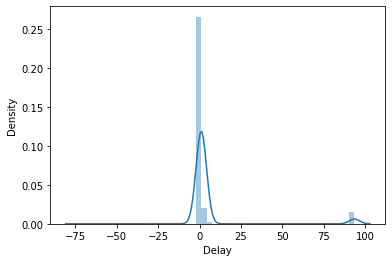

In [80]:
sns.distplot(Final['Delay'])

In [81]:
Final['due_in_date']=pd.to_datetime(Final['due_in_date'],format='%Y%m%d')

In [82]:
Final['Predicted_date']=Final['due_in_date']+pd.to_timedelta(Final['Delay'], unit='d')

In [83]:
Final['Predicted_date']=Final['Predicted_date'].astype('str').str[:11]

In [84]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Predicted_date
0,1,U001,200881076,ALBERT corporation,NaN,2020.0,1.930850e+09,2020-05-01,20200502,20200501,...,USD,RV,1.0,76693.51,20200501.0,NAA8,1.930850e+09,1,1.010989,2020-05-17
1,7,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930648e+09,2020-03-15,20200313,20200315,...,USD,RV,1.0,14427.62,20200315.0,NAH4,1.930648e+09,1,1.010989,2020-03-31
2,8,CA02,0140104440,SO us,NaN,2020.0,2.960630e+09,2020-04-22,20200422,20200422,...,CAD,RV,1.0,55370.56,20200423.0,CA10,2.960630e+09,1,2.169835,2020-05-05
3,11,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930842e+09,2020-05-01,20200430,20200501,...,USD,RV,1.0,31045.62,20200501.0,NAH4,1.930842e+09,1,1.010989,2020-05-17
4,16,U001,100026809,PRES corporation,NaN,2020.0,1.930916e+09,2020-05-19,20200519,20200519,...,USD,RV,1.0,402.50,20200519.0,NA10,1.930916e+09,1,1.010989,2020-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49986,U001,0200744019,TARG foundation,NaN,2020.0,1.930611e+09,2020-03-07,20200306,20200307,...,USD,RV,1.0,27576.44,20200307.0,NAGD,1.930611e+09,1,1.010989,2020-05-12
9996,49990,U013,0140103278,COS corp,NaN,2020.0,1.991840e+09,2020-03-04,20200227,20200304,...,USD,RV,1.0,1356.04,20200304.0,NAUZ,1.991840e+09,1,-1.848096,2020-05-01
9997,49995,U001,0100044010,LAND foundation,NaN,2020.0,1.930765e+09,2020-04-09,20200408,20200409,...,USD,RV,1.0,46490.22,20200409.0,NA32,1.930765e+09,1,1.010989,2020-05-12
9998,49996,U001,0100031704,DELHAIZE in,NaN,2020.0,1.930738e+09,2020-04-03,20200402,20200403,...,USD,RV,1.0,23538.52,20200403.0,NAA8,1.930738e+09,1,1.010989,2020-04-19


In [87]:
Final.to_csv (r'C:\Users\shwet\Desktop\export_dataframe.csv', index = False)